# Data Cleaning 

In [319]:
import pandas as pd
import re


In [320]:
pd.set_option('max_colwidth',150)

## Arabic Quran

In [321]:
# reading the Arabic Quran version.
quran_A = pd.read_csv("../data/quran-simple.txt", names=["chapter_num", "verse_num", "verse"], sep="|" )
quran_A.head(10)

,chapter_num,verse_num,verse
0,1,1.0,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ
1,1,2.0,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
2,1,3.0,الرَّحْمَٰنِ الرَّحِيمِ
3,1,4.0,مَالِكِ يَوْمِ الدِّينِ
4,1,5.0,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ
5,1,6.0,اهْدِنَا الصِّرَاطَ الْمُسْتَقِيمَ
6,1,7.0,صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْرِ الْمَغْضُوبِ عَلَيْهِمْ وَلَا الضَّالِّينَ
7,2,1.0,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الم
8,2,2.0,ذَٰلِكَ الْكِتَابُ لَا رَيْبَ فِيهِ هُدًى لِّلْمُتَّقِينَ
9,2,3.0,الَّذِينَ يُؤْمِنُونَ بِالْغَيْبِ وَيُقِيمُونَ الصَّلَاةَ وَمِمَّا رَزَقْنَاهُمْ يُنفِقُونَ


In [322]:
# taking a look at our data
quran_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   chapter_num  6264 non-null   object 
 1   verse_num    6236 non-null   float64
 2   verse        6236 non-null   object 
dtypes: float64(1), object(2)
memory usage: 146.9+ KB


- there are around 30 missing values in both verse_num and verse columns.
- verse_num Dtype is float but it should be integer.

In [323]:
# looking at the missing data
quran_A[quran_A.verse.isnull()]

,chapter_num,verse_num,verse
6236,# PLEASE DO NOT REMOVE OR CHANGE THIS COPYRIGHT BLOCK,NaN,NaN
6237,#====================================================================,NaN,NaN
6238,#,NaN,NaN
6239,"# Tanzil Quran Text (Simple, Version 1.1)",NaN,NaN
6240,# Copyright (C) 2007-2022 Tanzil Project,NaN,NaN
6241,# License: Creative Commons Attribution 3.0,NaN,NaN
6242,#,NaN,NaN
6243,"# This copy of the Quran text is carefully produced, highly",NaN,NaN
6244,# verified and continuously monitored by a group of specialists,NaN,NaN
6245,# at Tanzil Project.,NaN,NaN


In [324]:
# droping these inequivalent rows.
quran_A.dropna(inplace=True)

In [325]:
# adjusting the types.
quran_A["chapter_num"]=quran_A.chapter_num.astype(int)
quran_A["verse_num"]=quran_A.verse_num.astype(int)
quran_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6236 entries, 0 to 6235
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   chapter_num  6236 non-null   int64 
 1   verse_num    6236 non-null   int64 
 2   verse        6236 non-null   object
dtypes: int64(2), object(1)
memory usage: 194.9+ KB


In [326]:
# checking the 1st verse of each chapter.
quran_A[quran_A.verse_num == 1]

,chapter_num,verse_num,verse
0,1,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ
7,2,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الم
293,3,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الم
493,4,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ يَا أَيُّهَا النَّاسُ اتَّقُوا رَبَّكُمُ الَّذِي خَلَقَكُم مِّن نَّفْسٍ وَاحِدَةٍ وَخَلَقَ مِنْهَا زَوْجَهَ...
669,5,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ يَا أَيُّهَا الَّذِينَ آمَنُوا أَوْفُوا بِالْعُقُودِ أُحِلَّتْ لَكُم بَهِيمَةُ الْأَنْعَامِ إِلَّا مَا يُتْ...
...,...,...,...
6213,110,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ إِذَا جَاءَ نَصْرُ اللَّهِ وَالْفَتْحُ
6216,111,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ تَبَّتْ يَدَا أَبِي لَهَبٍ وَتَبَّ
6221,112,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ قُلْ هُوَ اللَّهُ أَحَدٌ
6225,113,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ قُلْ أَعُوذُ بِرَبِّ الْفَلَقِ


- some scholars say that "بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ" is a part of each chapter, so it shoul be numbered.
- other scholars say that it is not a part of each chapter, so it should not be counted.(this is why this verse is not at the first of each chapter in the translated version)
- all scholars agree that it is a part of the first chapter (الفاتحة) and it is not a part of the 9th chapter (التوبة).



## English quran

In [327]:
# reading an English translation version.
quran_E = pd.read_csv("../data/english_saheeh_v1.1.0-csv.1.csv")
quran_E.head()

,id,sura,aya,translation,footnotes
0,1,1,1,"(1) In the name of Allāh,[2] the Entirely Merciful, the Especially Merciful.[3]","[2]- Allāh is a proper name belonging only to the one Almighty God, Creator and Sustainer of the heavens and the earth and all that is within them..."
1,2,1,2,"(2) [All] praise is [due] to Allāh, Lord[4] of the worlds -","[4]- When referring to Allāh (subḥānahu wa taʿālā) , the Arabic term ""rabb"" (translated as ""Lord"") includes all of the following meanings: ""owner,..."
2,3,1,3,"(3) The Entirely Merciful, the Especially Merciful,",NaN
3,4,1,4,(4) Sovereign of the Day of Recompense.[5],"[5]- i.e., repayment and compensation for whatever was earned of good or evil during life on this earth."
4,5,1,5,(5) It is You we worship and You we ask for help.,NaN


In [328]:
# taking a look at our data.
quran_E.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6236 non-null   int64 
 1   sura         6236 non-null   int64 
 2   aya          6236 non-null   int64 
 3   translation  6236 non-null   object
 4   footnotes    1612 non-null   object
dtypes: int64(3), object(2)
memory usage: 243.7+ KB


In [329]:
# we are not intersted in the footnotes and id is just an index.
quran_E.drop(columns=["footnotes", "id"], inplace=True)

In [330]:
# matching the names of the columns.
quran_E.columns=["chapter_num", "verse_num", "verse"]
quran_E

,chapter_num,verse_num,verse
0,1,1,"(1) In the name of Allāh,[2] the Entirely Merciful, the Especially Merciful.[3]"
1,1,2,"(2) [All] praise is [due] to Allāh, Lord[4] of the worlds -"
2,1,3,"(3) The Entirely Merciful, the Especially Merciful,"
3,1,4,(4) Sovereign of the Day of Recompense.[5]
4,1,5,(5) It is You we worship and You we ask for help.
...,...,...,...
6231,114,2,"(2) The Sovereign of mankind,"
6232,114,3,"(3) The God of mankind,"
6233,114,4,(4) From the evil of the retreating whisperer[2016] -
6234,114,5,(5) Who whispers [evil] into the breasts of mankind -


## creating functions to clean our data.

In [331]:
def word_count(text):
    return len(text.split())
    

In [293]:
def cleaning(verse):
    # for the Arabic version
    verse = re.sub("[ًًٌٌٍٍَُِّّْٰٓٓ]","",verse)
    verse = re.sub("[آ]","ا",verse)

    # for the English transelation
    verse = verse.lower()
    verse = re.sub("\[.*?\]","",verse)
    verse = re.sub("[(0-9)]","",verse)
    verse = re.sub("[-.,;:]","",verse)
    verse = re.sub("  "," ",verse)
    verse = verse.strip()

    return verse

cleaning(quran_A.verse[1265])


'اتخذوا أحبارهم ورهبانهم أربابا من دون الله والمسيح ابن مريم وما أمروا إلا ليعبدوا إلها واحدا لا إله إلا هو سبحانه عما يشركون'

In [332]:
# removing the basmelah of the first verse in each chapter.
def remove_basmalah(first_aya):
    first_aya = re.sub("بسم الله الرحمن الرحيم ", "", first_aya)
    
    return first_aya

remove_basmalah(cleaning(quran_A.verse[493]))


'يا أيها الناس اتقوا ربكم الذي خلقكم من نفس واحدة وخلق منها زوجها وبث منهما رجالا كثيرا ونساء واتقوا الله الذي تساءلون به والأرحام إن الله كان عليكم رقيبا'

In [333]:
# creating a function to add a basmalah at the begining of each chapter with verse_num = 0
def add_basmalah(quran, language):
    
    """This function will insert a 'basmalah' at the start of each chapter with verse_num = 0"""

    if language == "A":
        b = "بسم الله الرحمن الرحيم"
    elif language == "E":
        b = "in the name of allāh the entirely merciful the especially merciful"
    else:
        print("invalide value or language; 'A' for Arabic or 'E' for English")
    
    a = list(quran[quran.verse_num == 1].index)
    a.remove(0)
    
    for chapter, i in enumerate(a):
        quran.loc[i-0.5] = {"chapter_num":chapter + 2,"verse_num":0,"verse":b}
    
    quran.iloc[0].verse = b

    quran = quran.drop(index= quran[(quran.chapter_num == 9) & (quran.verse_num == 0)].index)
    quran = quran.sort_index().reset_index(drop= True)
    return quran


In [334]:
# applying our functions on the English translation

quran_E["verse"] = quran_E.verse.apply(cleaning)
quran_E = add_basmalah(quran_E, "E")
quran_E["length"] = quran_E.verse.apply(word_count)
quran_E.head(10)


/tmp/ipykernel_665/3636650905.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quran.iloc[0].verse = b


,chapter_num,verse_num,verse,length
0,1,1,in the name of allāh the entirely merciful the especially merciful,11
1,1,2,praise is to allāh lord of the worlds,8
2,1,3,the entirely merciful the especially merciful,6
3,1,4,sovereign of the day of recompense,6
4,1,5,it is you we worship and you we ask for help,11
5,1,6,guide us to the straight path,6
6,1,7,the path of those upon whom you have bestowed favor not of those who have earned anger or of those who are astray,23
7,2,0,in the name of allāh the entirely merciful the especially merciful,11
8,2,1,alif lām meem,3
9,2,2,this is the book about which there is no doubt a guidance for those conscious of allāh,17


In [335]:
quran_A["verse"] = quran_A.verse.apply(cleaning)
quran_A["verse"] = quran_A.verse.apply(remove_basmalah)
quran_A = add_basmalah(quran_A, "A")
quran_A["length"] = quran_A.verse.apply(word_count)
quran_A.head(15)

/tmp/ipykernel_665/3636650905.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quran.iloc[0].verse = b


,chapter_num,verse_num,verse,length
0,1,1,بسم الله الرحمن الرحيم,4
1,1,2,الحمد لله رب العالمين,4
2,1,3,الرحمن الرحيم,2
3,1,4,مالك يوم الدين,3
4,1,5,إياك نعبد وإياك نستعين,4
5,1,6,اهدنا الصراط المستقيم,3
6,1,7,صراط الذين أنعمت عليهم غير المغضوب عليهم ولا الضالين,9
7,2,0,بسم الله الرحمن الرحيم,4
8,2,1,الم,1
9,2,2,ذلك الكتاب لا ريب فيه هدى للمتقين,7


- still we need to creat a data fram that combine the verses of each chapter.

# EDA

In [358]:
by_chapter =quran_A.groupby("chapter_num").length.agg(["mean","sum","count"])

In [359]:
def combine(list_of_text):

    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

by_chapter["chapter_verses"]=quran_A.groupby("chapter_num").verse.apply(combine)
by_chapter


,mean,sum,count,chapter_verses
chapter_num,,,,
1,4.142857,29,7,بسم الله الرحمن الرحيم الحمد لله رب العالمين الرحمن الرحيم مالك يوم الدين إياك نعبد وإياك نستعين اهدنا الصراط المستقيم صراط الذين أنعمت عليهم غير ...
2,21.411150,6145,287,بسم الله الرحمن الرحيم الم ذلك الكتاب لا ريب فيه هدى للمتقين الذين يؤمنون بالغيب ويقيمون الصلاة ومما رزقناهم ينفقون والذين يؤمنون بما أنزل إليك وم...
3,17.437811,3505,201,بسم الله الرحمن الرحيم الم الله لا إله إلا هو الحي القيوم نزل عليك الكتاب بالحق مصدقا لما بين يديه وأنزل التوراة والإنجيل من قبل هدى للناس وأنزل ا...
4,21.282486,3767,177,بسم الله الرحمن الرحيم يا أيها الناس اتقوا ربكم الذي خلقكم من نفس واحدة وخلق منها زوجها وبث منهما رجالا كثيرا ونساء واتقوا الله الذي تساءلون به وا...
5,23.479339,2841,121,بسم الله الرحمن الرحيم يا أيها الذين امنوا أوفوا بالعقود أحلت لكم بهيمة الأنعام إلا ما يتلى عليكم غير محلي الصيد وأنتم حرم إن الله يحكم ما يريد يا...
...,...,...,...,...
110,5.750000,23,4,بسم الله الرحمن الرحيم إذا جاء نصر الله والفتح ورأيت الناس يدخلون في دين الله أفواجا فسبح بحمد ربك واستغفره إنه كان توابا
111,4.500000,27,6,بسم الله الرحمن الرحيم تبت يدا أبي لهب وتب ما أغنى عنه ماله وما كسب سيصلى نارا ذات لهب وامرأته حمالة الحطب في جيدها حبل من مسد
112,3.800000,19,5,بسم الله الرحمن الرحيم قل هو الله أحد الله الصمد لم يلد ولم يولد ولم يكن له كفوا أحد


In [405]:
from nltk import word_tokenize
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()

w= "بسم الله الرحمن الرحيم يا أيها الناس اتقوا ربكم الذي خلقكم من نفس واحدة وخلق منها زوجها وبث منهما"

" ".join([ st.stem(a) for a in word_tokenize(w)])

'بسم الل رحم رحم يا ايه ناس اتق ربكم الذي خلق من نفس وحد خلق منها زوج وبث منه'

In [413]:
from farasa.stemmer import FarasaStemmer
stemmer = FarasaStemmer()
by_chapter["stemmed"] = by_chapter.chapter_verses.apply(stemmer.stem)
by_chapter


,mean,sum,count,chapter_verses,stemmed
chapter_num,,,,,
1,4.142857,29,7,بسم الله الرحمن الرحيم الحمد لله رب العالمين الرحمن الرحيم مالك يوم الدين إياك نعبد وإياك نستعين اهدنا الصراط المستقيم صراط الذين أنعمت عليهم غير ...,بسم الله رحمن رحيم حمد الله رب عالم رحمن رحيم مالك يوم دين إياك عبد إياك استعان اهد صراط مستقيم صراط الذي أنعم على غير مغضوب على لا ضال
2,21.411150,6145,287,بسم الله الرحمن الرحيم الم ذلك الكتاب لا ريب فيه هدى للمتقين الذين يؤمنون بالغيب ويقيمون الصلاة ومما رزقناهم ينفقون والذين يؤمنون بما أنزل إليك وم...,بسم الله رحمن رحيم الم ذلك كتاب لا ريب في هدى متقي الذي آمن غيب أقام صلاة من رزقناهم أنفق الذي آمن ما أنزل إلى ما أنزل من قبل اخر هم يوقن أولائك ع...
3,17.437811,3505,201,بسم الله الرحمن الرحيم الم الله لا إله إلا هو الحي القيوم نزل عليك الكتاب بالحق مصدقا لما بين يديه وأنزل التوراة والإنجيل من قبل هدى للناس وأنزل ا...,بسم الله رحمن رحيم الم الله لا إله إلا هو حي قيوم نزل على كتاب حق مصدق ما بين يد أنزل توراة إنجيل من قبل هدى ناس أنزل فرقان إن الذي كفر باي الله ل...
4,21.282486,3767,177,بسم الله الرحمن الرحيم يا أيها الناس اتقوا ربكم الذي خلقكم من نفس واحدة وخلق منها زوجها وبث منهما رجالا كثيرا ونساء واتقوا الله الذي تساءلون به وا...,بسم الله رحمن رحيم يا أي ناس اتقى رب الذي خلق من نفس واحد خلق من زوج بث من رجل كثير نساء اتقى الله الذي تساءل ب رحم إن الله كان على رقيب وات يتيم ...
5,23.479339,2841,121,بسم الله الرحمن الرحيم يا أيها الذين امنوا أوفوا بالعقود أحلت لكم بهيمة الأنعام إلا ما يتلى عليكم غير محلي الصيد وأنتم حرم إن الله يحكم ما يريد يا...,بسم الله رحمن رحيم يا أي الذي امن أوفى عقد أحل ل بهيمة أنعام إلا ما تلا على غير محلي صيد أنتم حرم إن الله حكم ما أراد يا أي الذي امن لا تحلى شعيرة...
...,...,...,...,...,...
110,5.750000,23,4,بسم الله الرحمن الرحيم إذا جاء نصر الله والفتح ورأيت الناس يدخلون في دين الله أفواجا فسبح بحمد ربك واستغفره إنه كان توابا,بسم الله رحمن رحيم إذا جاء نصر الله فتح رأى ناس دخل في دين الله فوج سبح حمد رب استغفر إن كان تواب
111,4.500000,27,6,بسم الله الرحمن الرحيم تبت يدا أبي لهب وتب ما أغنى عنه ماله وما كسب سيصلى نارا ذات لهب وامرأته حمالة الحطب في جيدها حبل من مسد,بسم الله رحمن رحيم بت يد أب لهب تب ما أغنى عن مال ما كسب صلى نار ذات لهب امرأة حمال حطب في جيد حبل من مسد
112,3.800000,19,5,بسم الله الرحمن الرحيم قل هو الله أحد الله الصمد لم يلد ولم يولد ولم يكن له كفوا أحد,بسم الله رحمن رحيم قال هو الله أحد الله صمد لم ولد لم ولد لم كان ل كف أحد


In [443]:
quran_A["stemmed"] = quran_A.verse.apply(stemmer.stem)
quran_A

,chapter_num,verse_num,verse,length,stemmed
0,1,1,بسم الله الرحمن الرحيم,4,بسم الله رحمن رحيم
1,1,2,الحمد لله رب العالمين,4,حمد الله رب عالم
2,1,3,الرحمن الرحيم,2,رحمن رحيم
3,1,4,مالك يوم الدين,3,مالك يوم دين
4,1,5,إياك نعبد وإياك نستعين,4,إياك عبد إياك استعان
...,...,...,...,...,...
6343,114,2,ملك الناس,2,ملك ناس
6344,114,3,إله الناس,2,إله ناس
6345,114,4,من شر الوسواس الخناس,4,من شر وسواس خناس
6346,114,5,الذي يوسوس في صدور الناس,5,الذي يوسوس في صدور ناس


In [469]:
#if 
print(bool(re.search("بسم", quran_A.verse[0])))
quran_A[["chapter_num", "verse_num", "verse"]].iloc[7]
quran_A.verse.iloc[8]

True


'الم'

In [487]:



def search(text, quran, stem= False):
    df = pd.DataFrame(columns=["chapter_num", "verse_num", "verse"])
    c = 0

    if stem:
        stemed_text= stemmer.stem(text)
    for i in range(quran.shape[0]):
        if bool(re.search(text, quran.verse.iloc[i])):
           df.loc[c]= quran[["chapter_num", "verse_num", "verse"]].iloc[i]
           c = c + 1 
        
        elif stem:
            if bool(re.search(stemed_text, quran.verse.iloc[i])):
                df.loc[c]= quran[["chapter_num", "verse_num", "verse"]].iloc[i]
                c = c + 1

    
    
    
    return df




In [490]:
A=search("مرضاتي", quran_A )
A

,chapter_num,verse_num,verse
0,60,1,يا أيها الذين امنوا لا تتخذوا عدوي وعدوكم أولياء تلقون إليهم بالمودة وقد كفروا بما جاءكم من الحق يخرجون الرسول وإياكم أن تؤمنوا بالله ربكم إن كنتم...


In [414]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('arabic')

# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=stopwords_list)
data_cv = cv.fit_transform(by_chapter.stemmed)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = by_chapter.index
data_dtm

/opt/conda/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,آباء,آتى,آثر,آخذ,آخر,آذى,آلى,آمن,آنام,آوى,...,يوعون,يوفضون,يوق,يوقن,يولج,يولن,يولو,يوم,يومئذ,يونس
chapter_num,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,5,0,3,8,0,1,17,0,0,...,0,0,0,2,0,0,0,25,0,0
3,0,4,0,0,2,0,0,7,0,0,...,0,0,0,0,0,0,1,16,1,0
4,0,5,0,0,7,0,0,8,0,0,...,0,0,0,0,0,0,0,9,1,1
5,0,3,0,2,3,0,0,3,0,0,...,0,0,0,1,0,0,0,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [418]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data_dtm.T.columns:
    top = data_dtm.T[c].sort_values(ascending=False).head(20)
    top_dict[c]= list(zip(top.index, top.values))

top_dict[2]

[('الله', 283),
 ('قال', 132),
 ('رب', 49),
 ('ناس', 39),
 ('امن', 31),
 ('كفر', 30),
 ('أولائك', 28),
 ('كتاب', 27),
 ('خير', 26),
 ('اتقى', 25),
 ('يوم', 25),
 ('أرض', 24),
 ('عمل', 23),
 ('هدى', 22),
 ('شيء', 22),
 ('حق', 22),
 ('أنزل', 21),
 ('عليم', 21),
 ('شاء', 21),
 ('أنفق', 19)]

In [416]:
# Print the top 10 words in each chapter
for chapter, top_words in top_dict.items():
    print(chapter)
    print(', '.join([word for word, count in top_words]))
    print('---')

1
الله, صراط, رحيم, رحمن, ضال, استعان, حمد, عالم, دين, أنعم
---
2
الله, قال, رب, ناس, امن, كفر, أولائك, كتاب, خير, اتقى
---
3
الله, قال, رب, كتاب, كفر, ناس, شيء, رسول, عذاب, يوم
---
4
الله, قال, رسول, سبيل, كفر, مؤمن, امن, نساء, عليم, ناس
---
5
الله, قال, امن, رسول, كفر, أنزل, قوم, رب, كتاب, أرض
---
6
الله, قال, رب, شيء, قوم, كذب, أرض, آمن, جاء, هدى
---
7
قال, رب, الله, قوم, أرض, موسى, جاء, كذب, باي, حق
---
8
الله, كفر, امن, مؤمن, قال, حق, قلب, رسول, عليم, شيء
---
9
الله, رسول, قال, كفر, مؤمن, قوم, سبيل, قلب, عمل, امن
---
10
الله, قال, رب, حق, أرض, قوم, ناس, جاء, كذب, عمل
---
11
قال, رب, الله, قوم, أمر, جاء, عمل, يوم, عذاب, أرض
---
12
قال, الله, يوسف, أخ, رب, أب, جاء, أرض, أمر, أتى
---
13
الله, قال, رب, أرض, كفر, أنزل, أمر, أولائك, قوم, دار
---
14
الله, رب, قال, أرض, سماء, كفر, عذاب, يوم, رسول, ناس
---
15
قال, رب, نزل, حق, سماء, بشر, مبين, ساجد, ملأك, معلوم
---
16
الله, رب, قال, شيء, عمل, هدى, يوم, خلق, عذاب, أرض
---
17
قال, رب, أرض, الله, قران, إنسان, كتاب, خلق, سبيل, وعد
---
18
قال, 

In [430]:
by_chapter[by_chapter["sum"] > 2000]["sum"]


chapter_num
2    6145
3    3505
4    3767
5    2841
6    3060
7    3345
9    2505
Name: sum, dtype: int64

In [440]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
#from wordcloud import WordCloud

wc = ArabicWordCloud(stopwords=stopwords_list, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

downloading and unzipping arabic font: /opt/conda/lib/python3.9/site-packages/ar_wordcloud/fonts/NotoNaskhArabic-unhinted.zip .. 
downloading and unzipping arabic font: /opt/conda/lib/python3.9/site-packages/ar_wordcloud/fonts/NotoSansArabic-unhinted.zip .. 
downloading and unzipping arabic font: /opt/conda/lib/python3.9/site-packages/ar_wordcloud/fonts/NotoKufiArabic-unhinted.zip .. 


In [439]:
#! pip install -U ar_wordcloud
from ar_wordcloud import ArabicWordCloud


(-0.5, 399.5, 199.5, -0.5)

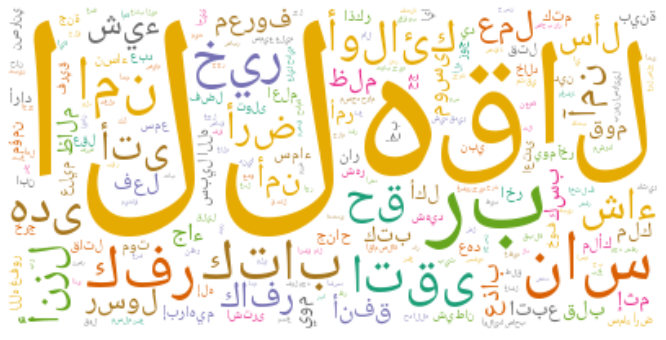

In [441]:
wc.generate(by_chapter.stemmed[2])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")


In [435]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

#full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
#              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, chapter in enumerate(data_dtm.columns):
    wc.generate(by_chapter.stemmed[chapter])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    #plt.title(full_names[index])
    if index > 7:
        break
    
plt.show()

KeyError: 'آباء'

In [431]:
by_chapter[(by_chapter["sum"] < 2000 ) & (by_chapter["sum"] > 1000)]["sum"]

chapter_num
8     1247
10    1843
11    1950
12    1799
16    1848
17    1562
18    1587
20    1357
21    1178
22    1283
23    1056
24    1323
26    1324
27    1163
28    1442
33    1307
39    1181
40    1230
Name: sum, dtype: int64

In [432]:
by_chapter[(by_chapter["sum"] < 1000 ) & (by_chapter["sum"] > 100)]["sum"]

chapter_num
13    858
14    834
15    661
19    975
25    900
29    982
30    821
31    554
32    376
34    888
35    782
36    734
37    869
38    739
41    798
42    864
43    840
44    350
45    492
46    649
47    546
48    564
49    357
50    377
51    364
52    316
53    364
54    346
55    356
56    383
57    579
58    479
59    451
60    356
61    230
62    181
63    185
64    246
65    293
66    258
67    337
68    305
69    264
70    221
71    231
72    290
73    204
74    260
75    168
76    247
77    185
78    178
79    183
80    137
81    108
83    173
84    112
85    113
89    143
Name: sum, dtype: int64

In [428]:
by_chapter[(by_chapter["sum"] < 100 )]

,mean,sum,count,chapter_verses,stemmed
chapter_num,,,,,
1,4.142857,29,7,بسم الله الرحمن الرحيم الحمد لله رب العالمين الرحمن الرحيم مالك يوم الدين إياك نعبد وإياك نستعين اهدنا الصراط المستقيم صراط الذين أنعمت عليهم غير ...,بسم الله رحمن رحيم حمد الله رب عالم رحمن رحيم مالك يوم دين إياك عبد إياك استعان اهد صراط مستقيم صراط الذي أنعم على غير مغضوب على لا ضال
82,4.250000,85,20,بسم الله الرحمن الرحيم إذا السماء انفطرت وإذا الكواكب انتثرت وإذا البحار فجرت وإذا القبور بعثرت علمت نفس ما قدمت وأخرت يا أيها الإنسان ما غرك بربك...,بسم الله رحمن رحيم إذا سماء انفطر إذا كوكب انتثر إذا بحر فجر إذا قبر بعثر علم نفس ما قدم خر يا أي إنسان ما غر رب كريم الذي خلق سوى عدل في أي صورة ...
86,3.611111,65,18,بسم الله الرحمن الرحيم والسماء والطارق وما أدراك ما الطارق النجم الثاقب إن كل نفس لما عليها حافظ فلينظر الإنسان مم خلق خلق من ماء دافق يخرج من بين...,بسم الله رحمن رحيم سماء طارق ما أدراك ما طارق نجم ثاقب إن كل نفس ما على حافظ نظر إنسان من خلق خلق من ماء دافق خرج من بين صلب تريبة إن على رجع قادر...
87,3.800000,76,20,بسم الله الرحمن الرحيم سبح اسم ربك الأعلى الذي خلق فسوى والذي قدر فهدى والذي أخرج المرعى فجعله غثاء أحوى سنقرئك فلا تنسى إلا ما شاء الله إنه يعلم ...,بسم الله رحمن رحيم سبح اسم رب أعلى الذي خلق سوى الذي قدر هدى الذي أخرج مرعى جعل غثاء أحوى سنقرئك لا نسي إلا ما شاء الله إن علم جهر ما خفي نيسرك أي...
88,3.555556,96,27,بسم الله الرحمن الرحيم هل أتاك حديث الغاشية وجوه يومئذ خاشعة عاملة ناصبة تصلى نارا حامية تسقى من عين انية ليس لهم طعام إلا من ضريع لا يسمن ولا يغن...,بسم الله رحمن رحيم هل أتى حديث غاشية وجه يومئذ خاشع عامل ناصب صلى نار حامي أسقى من عين اني ليس ل طعام إلا من ضريع لا أسمن لا أغنى من جوع وجه يومئذ...
90,4.095238,86,21,بسم الله الرحمن الرحيم لا أقسم بهذا البلد وأنت حل بهذا البلد ووالد وما ولد لقد خلقنا الإنسان في كبد أيحسب أن لن يقدر عليه أحد يقول أهلكت مالا لبدا...,بسم الله رحمن رحيم لا أقسم هذا بلد أنت حل هذا بلد والد ما ولد قد خلق إنسان في كبد أيحسب أن لن قدر على أحد قال أهلك مال بدا أيحسب أن لم رأى أحد ألم...
91,3.625000,58,16,بسم الله الرحمن الرحيم والشمس وضحاها والقمر إذا تلاها والنهار إذا جلاها والليل إذا يغشاها والسماء وما بناها والأرض وما طحاها ونفس وما سواها فألهمه...,بسم الله رحمن رحيم شمس ضحى قمر إذا تلا نهار إذا جلا ليل إذا غشي سماء ما بنى أرض ما طحا نفس ما سوى ألهم فجور تقوى قد أفلح من زكى قد خاب من دسا كذب ...
92,3.409091,75,22,بسم الله الرحمن الرحيم والليل إذا يغشى والنهار إذا تجلى وما خلق الذكر والأنثى إن سعيكم لشتى فأما من أعطى واتقى وصدق بالحسنى فسنيسره لليسرى وأما من...,بسم الله رحمن رحيم ليل إذا غشي نهار إذا تجلى ما خلق ذكر أنثى إن سعي شتى أما من أعطى اتقى صدق أحسن يسر أيسر أما من بخل استغنى كذب أحسن يسر عسرى ما ...
93,3.666667,44,12,بسم الله الرحمن الرحيم والضحى والليل إذا سجى ما ودعك ربك وما قلى وللاخرة خير لك من الأولى ولسوف يعطيك ربك فترضى ألم يجدك يتيما فاوى ووجدك ضالا فهد...,بسم الله رحمن رحيم ضحى ليل إذا سجى ما دعك رب ما قلى اخر خير ل من أول سوف أعطى رب رضي ألم وجد يتيم اوى وجد ضال هدى وجد عائل أغنى أما يتيم لا قهر أم...
